In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
import math

In [3]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select inc_dincident,inc_time from DatixCRM.dbo.incidents_main where inc_type='PAT' and inc_category='MEDIC' and inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
print(df)

     inc_dincident inc_time
0       2016-03-31     0800
1       2016-03-31     2100
2       2019-09-05     1530
3       2019-09-05     1541
4       2019-09-25     1232
5       2019-09-25     1345
6       2019-09-16     0100
7       2016-04-01     1957
8       2016-03-25     1400
9       2016-04-02     0730
10      2016-04-01     1200
11      2016-04-01     1800
12      2016-04-02     1600
13      2016-04-02     1700
14      2019-01-07     1800
15      2019-09-17     0600
16      2016-04-03     1630
17      2016-04-03     1715
18      2016-04-02     1000
19      2016-04-02     1000
20      2016-04-02     1000
21      2016-04-02     1100
22      2016-04-02     1200
23      2016-04-04     1450
24      2016-04-02     1200
25      2016-04-04     1030
26      2016-04-02     1400
27      2016-03-23     1000
28      2016-04-02     1000
29      2016-04-02     1000
...            ...      ...
9029    2019-10-07     0250
9030    2019-07-17     1500
9031    2019-02-19     1535
9032    2019-09-12  

In [4]:
df = df[df.inc_dincident > '2016-03-31']
df = df[df.inc_dincident < '2019-10-01']
print(df)

     inc_dincident inc_time
2       2019-09-05     1530
3       2019-09-05     1541
4       2019-09-25     1232
5       2019-09-25     1345
6       2019-09-16     0100
7       2016-04-01     1957
9       2016-04-02     0730
10      2016-04-01     1200
11      2016-04-01     1800
12      2016-04-02     1600
13      2016-04-02     1700
14      2019-01-07     1800
15      2019-09-17     0600
16      2016-04-03     1630
17      2016-04-03     1715
18      2016-04-02     1000
19      2016-04-02     1000
20      2016-04-02     1000
21      2016-04-02     1100
22      2016-04-02     1200
23      2016-04-04     1450
24      2016-04-02     1200
25      2016-04-04     1030
26      2016-04-02     1400
28      2016-04-02     1000
29      2016-04-02     1000
30      2016-04-04     1945
31      2016-04-04     2100
32      2016-04-05     0915
34      2016-04-06     0800
...            ...      ...
8993    2019-09-23     1554
8994    2019-09-20     1015
8996    2019-05-20     0700
8997    2019-05-15  

In [36]:
df['hour'] = df['inc_time'].str[:2]
df = df.astype({'hour':'int'})
print(df[df.hour == 23])

     inc_dincident inc_time  hour
87      2016-04-14     2300    23
108     2016-04-20     2359    23
155     2016-05-01     2300    23
175     2016-05-05     2315    23
193     2016-05-08     2300    23
536     2016-07-14     2330    23
589     2016-07-28     2347    23
590     2016-07-28     2300    23
621     2016-08-03     2300    23
622     2016-08-03     2300    23
630     2016-08-02     2339    23
638     2016-08-08     2300    23
698     2016-08-21     2300    23
807     2016-09-11     2330    23
836     2016-09-15     2300    23
919     2016-09-30     2310    23
920     2016-09-30     2300    23
934     2016-10-04     2315    23
939     2016-10-05     2350    23
1078    2016-10-25     2300    23
1142    2016-11-06     2340    23
1213    2016-11-17     2330    23
1315    2016-12-01     2300    23
1451    2016-12-19     2330    23
1502    2016-12-31     2300    23
1673    2017-01-29     2325    23
1679    2017-01-31     2300    23
1680    2017-01-31     2300    23
1719    2017-0

In [48]:
total_days = (max(df.inc_dincident)-min(df.inc_dincident)).days

(-0.5, 3301.5, 495.5, -0.5)

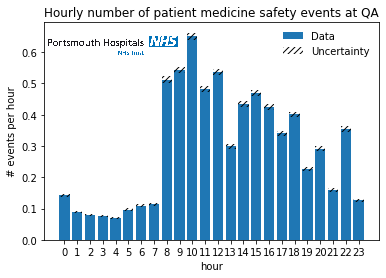

In [69]:
bins = [i-0.5 for i in range(25)]
data_x = [i for i in range(24)]
data_y_tot,_ = np.histogram(df.hour.values, bins=bins)
data_y = data_y_tot/total_days
data_y_err = np.sqrt(data_y_tot)/total_days
plt.bar(data_x,data_y,label='Data')
plt.bar(data_x,data_y_err,bottom=data_y-data_y_err/2,alpha=0.5,color='none',hatch="////",label='Uncertainty')
plt.legend(frameon=False)
ax = plt.gca()
ax.set_xticks(np.arange(24))
plt.xlabel('hour');
plt.ylabel('# events per hour')
plt.title('Hourly number of patient medicine safety events at QA')
img = plt.imread("nhsportsmouth.png");
ax = plt.axes([0.125+0.01,0.65, 0.3, 0.3], frameon=True)  # Change the numbers in this array to position your image [left, bottom, width, height])
ax.imshow(img)
ax.axis('off')  # get rid of the ticks and ticklabels

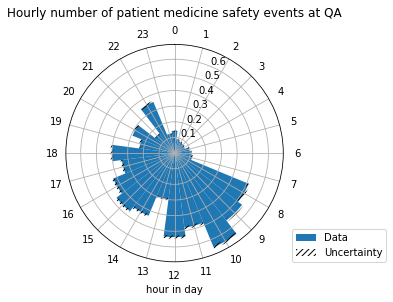

In [102]:
# Compute pie slices
N = 24
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
theta_deg = np.linspace(0.0, 360, N, endpoint=False)
radii = data_y
radii_err = data_y_err
width = 2 * np.pi/N
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width,label='Data');
ax.bar(theta, radii_err, bottom=radii-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xlabel('hour in day')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) )

In [117]:
morning_radii = np.zeros(len(radii))
afternoon_radii = np.zeros(len(radii))
evening_radii = np.zeros(len(radii))
for i in range(24):
    print(i)
    if i <= 7: morning_radii[i] = radii[i]
    elif i >= 8 and i <= 15: afternoon_radii[i] = radii[i]
    else: evening_radii[i] = radii[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


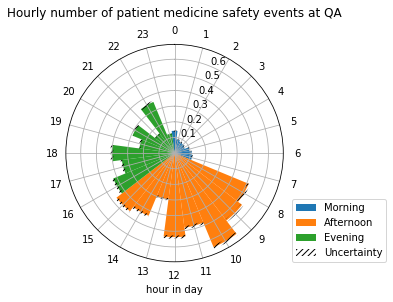

In [119]:
ax = plt.subplot(111, projection='polar')
ax.bar(theta, morning_radii, width=width,label='Morning');
ax.bar(theta, afternoon_radii, width=width,label='Afternoon');
ax.bar(theta, evening_radii, width=width,label='Evening');
ax.bar(theta, radii_err, bottom=radii-radii_err/2,width=width,alpha=0.5,color='none',hatch="////",label='Uncertainty');
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
plt.xlabel('hour in day')
plt.title('Hourly number of patient medicine safety events at QA',y=1.1)
plt.legend(loc=(1.04,0))
lines, labels = plt.thetagrids( theta_deg, (data_x) )